# The Spark Foundation
# Stream: Data Science and Business Analytics
# Task 4: Exploratory Data Analysis - Terrorism
###                (Level - Intermediate)
## Presented By : Tharun Guduguntla

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from pandas import DataFrame

### Lets see what data is stored in the given file

In [9]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
pd.set_option('display.max_columns', 999)
df.head()

/Users/rentomojo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

### This data is so clumpsy with so many columns and so many NAN values

#### Lets rename the columns 

In [10]:
df.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','location':'Location', 'success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','targsubtype1_txt':'Target_Sub_Type','corp1':'Corporation','target1':'Target','natlty1_txt':'Target_Nation','weaptype1_txt':'Weapon_Type','weapsubtype1_txt':'Weapon_Sub_Type','weapdetail':'Weapon_detail','nkill':'Killed','nwound':'Wounded'},inplace=True)
df= df[['Year','Month','Day','Country','Region','City','Latitude','Longitude','Location','Success','Suicide','Attack_Type','Target_Type','Target_Sub_Type','Corporation','Target','Target_Nation','Weapon_Type','Weapon_Sub_Type','Weapon_detail','Killed','Wounded']]
df.head(20)

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Location,Success,Suicide,Attack_Type,Target_Type,Target_Sub_Type,Corporation,Target,Target_Nation,Weapon_Type,Weapon_Sub_Type,Weapon_detail,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,0,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,Unknown,NaN,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,Unknown,NaN,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,NaN,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,NaN,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Explosives,Unknown Explosive Type,Explosive,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Incendiary,NaN,Incendiary,NaN,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,NaN,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,United States,Firearms,Unknown Gun Type,Several gunshots were fired.,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,NaN,0,0,Assassination,Police,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,Uruguay,Firearms,Automatic or Semi-Automatic Rifle,Automatic firearm,0.0,0.0
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Edes Substation,1,0,Bombing/Explosion,Utilities,Electricity,Pacific Gas & Electric Company,Edes Substation,United States,Explosives,Unknown Explosive Type,NaN,0.0,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,NaN,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",United States,Incendiary,Molotov Cocktail/Petrol Bomb,Firebomb consisting of gasoline,0.0,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,NaN,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,United States,Incendiary,Gasoline or Alcohol,Poured gasoline on the floor and lit it with a...,0.0,0.0


### Many columns are unncessary so remove them

In [11]:
df.drop(['Target_Sub_Type','Corporation','Target','Target_Nation','Weapon_Sub_Type','Weapon_detail','Location'], axis = 1, inplace=True)
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
Latitude        4556
Longitude       4557
Success            0
Suicide            0
Attack_Type        0
Target_Type        0
Weapon_Type        0
Killed         10313
Wounded        16311
dtype: int64

### Most attacks as per contries

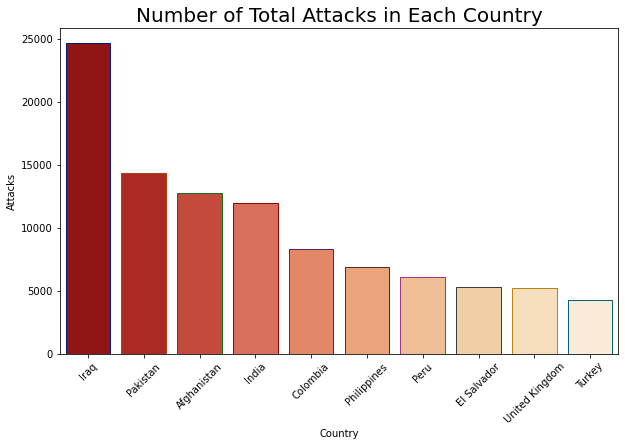

In [12]:
plt.subplots(figsize=(10,6))
country_attacks = df.Country.value_counts()[:10].reset_index()
country_attacks.columns = ['Country','Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Attacks'],palette='OrRd_r',edgecolor=sns.color_palette('dark',15))
plt.xticks(rotation=45)
plt.title('Number of Total Attacks in Each Country',size=20)
plt.show()


### Raise of attacks in past 45 years

/Users/rentomojo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


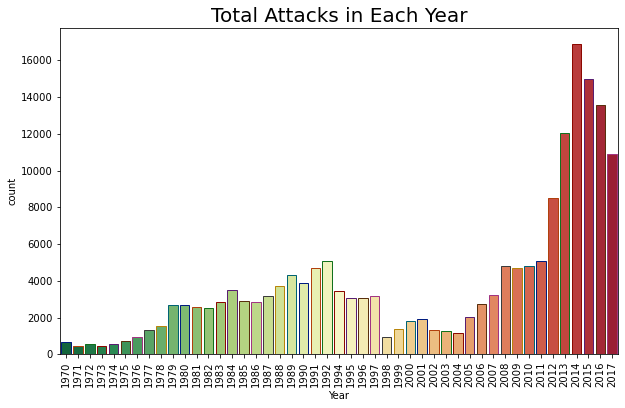

In [13]:
plt.subplots(figsize=(10,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Total Attacks in Each Year',size=20)
plt.show()

### All types of weapons used

In [14]:
weapons = df['Weapon_Type'].value_counts()
weapons = DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon used', 'Weapon Count']
weapons

,Weapon used,Weapon Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


### Most number of weapons used for the attacks

<AxesSubplot:xlabel='Weapon used'>

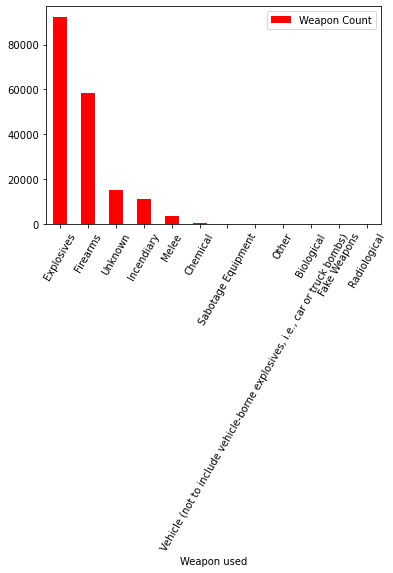

In [15]:
weapons.plot.bar(x='Weapon used', y='Weapon Count', rot=60,color = 'r')

### Suicides count with Years

<AxesSubplot:xlabel='Year'>

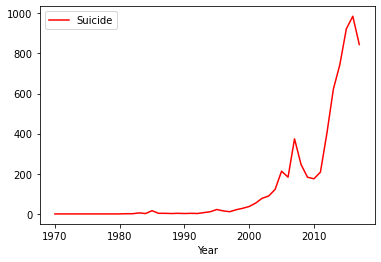

In [16]:
Suicides_by_year= df[['Year','Suicide']].groupby('Year').aggregate(np.sum)
Suicides_by_year.plot(color = 'r')

# THANK YOU